5. We now want to build a social graph where each node corresponds to a hashtag and an edge between hashtag A and hashtag B indicates that there is at least one tweet which contains both hashtag A and hashtag B. Implement a python program that allows you to identify hashtags from Tweet content message and generate the above social network graph.

In [141]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

#deleted #militaryukraine because it has no other connection
hashtags = ['ukrainewar', 'war', 'army', 'military', 'kiev', 'ua', 'specialforces', 'donbass', 'donbasswar', 'warukraine', 'russia', 'donetsk', 'soldiers', 'ukrainenews', 'odessa', 'ukrainianarmy', 'lviv', 'victory', 'nato', 'kyiv', 'militaryukraine']
tweets = pd.read_csv('tweets_20000.csv')

dictOfhashtags = { i : [] for i in hashtags }
list_of_matches = []

for index, row in tweets.iterrows():
    list_of_matches.append(set([hashtag_tweet.lower() for hashtag_tweet in ast.literal_eval(row.loc['hashtags'])]).intersection(hashtags))
        


In [142]:
print(list_of_matches)

[{'russia'}, {'nato'}, {'military'}, {'russia'}, set(), {'russia'}, {'russia'}, {'russia'}, {'kiev', 'russia'}, {'russia'}, {'war'}, {'war', 'kyiv', 'russia'}, {'russia'}, {'russia'}, {'nato', 'russia'}, {'russia'}, {'russia'}, {'russia'}, {'russia'}, {'russia'}, {'odessa'}, {'war', 'russia'}, {'ukrainewar', 'russia'}, {'army'}, {'war', 'kyiv', 'russia'}, {'nato'}, {'army'}, {'war'}, {'nato', 'russia'}, {'kyiv'}, {'russia'}, {'ukrainewar'}, {'ukrainewar'}, {'ukrainewar', 'russia'}, {'military'}, {'nato', 'russia'}, {'ukrainewar', 'russia'}, {'ukrainewar'}, {'russia'}, {'kiev'}, {'russia'}, {'nato', 'russia'}, {'russia'}, {'russia'}, {'russia'}, {'russia'}, {'russia'}, {'russia'}, {'army'}, {'army'}, {'donbass'}, {'russia'}, {'ukrainewar'}, {'russia'}, {'odessa'}, {'nato'}, {'kiev'}, {'russia'}, {'donetsk'}, {'ukrainewar'}, {'russia'}, {'russia'}, {'kyiv', 'ukrainewar', 'russia'}, {'ukrainewar'}, {'russia'}, {'army'}, {'military'}, {'war', 'russia'}, {'nato'}, {'nato'}, {'nato'}, {'russ

In [143]:
list_of_matches_with_more_than_one = []
for element in list_of_matches:
    if len(element) >= 2:
        list_of_matches_with_more_than_one.append(element)

In [144]:
print(list_of_matches_with_more_than_one)

[{'kiev', 'russia'}, {'war', 'kyiv', 'russia'}, {'nato', 'russia'}, {'war', 'russia'}, {'ukrainewar', 'russia'}, {'war', 'kyiv', 'russia'}, {'nato', 'russia'}, {'ukrainewar', 'russia'}, {'nato', 'russia'}, {'ukrainewar', 'russia'}, {'nato', 'russia'}, {'kyiv', 'ukrainewar', 'russia'}, {'war', 'russia'}, {'nato', 'donbass', 'russia'}, {'kyiv', 'lviv'}, {'kyiv', 'kiev'}, {'nato', 'russia'}, {'nato', 'russia'}, {'nato', 'donbass', 'russia'}, {'kyiv', 'ukrainewar', 'odessa', 'russia'}, {'kyiv', 'ukrainewar'}, {'donbass', 'russia'}, {'ukrainewar', 'russia'}, {'kyiv', 'donbass', 'russia'}, {'kyiv', 'ukrainewar', 'odessa', 'russia'}, {'nato', 'russia'}, {'war', 'army', 'russia'}, {'kyiv', 'russia'}, {'ukrainewar', 'russia'}, {'war', 'russia'}, {'war', 'ukrainewar', 'russia'}, {'war', 'kyiv', 'russia'}, {'nato', 'russia'}, {'war', 'kyiv', 'russia'}, {'war', 'nato', 'russia'}, {'kyiv', 'lviv'}, {'kyiv', 'ukrainewar', 'odessa', 'russia'}, {'war', 'ukrainewar'}, {'ukrainewar', 'donbass'}, {'ukrai

In [145]:
import itertools

combis = []

for element in list_of_matches_with_more_than_one:
    combis.append(list(itertools.combinations(element, 2)))

print(combis)

[[('kiev', 'russia')], [('war', 'kyiv'), ('war', 'russia'), ('kyiv', 'russia')], [('nato', 'russia')], [('war', 'russia')], [('ukrainewar', 'russia')], [('war', 'kyiv'), ('war', 'russia'), ('kyiv', 'russia')], [('nato', 'russia')], [('ukrainewar', 'russia')], [('nato', 'russia')], [('ukrainewar', 'russia')], [('nato', 'russia')], [('kyiv', 'ukrainewar'), ('kyiv', 'russia'), ('ukrainewar', 'russia')], [('war', 'russia')], [('nato', 'donbass'), ('nato', 'russia'), ('donbass', 'russia')], [('kyiv', 'lviv')], [('kyiv', 'kiev')], [('nato', 'russia')], [('nato', 'russia')], [('nato', 'donbass'), ('nato', 'russia'), ('donbass', 'russia')], [('kyiv', 'ukrainewar'), ('kyiv', 'odessa'), ('kyiv', 'russia'), ('ukrainewar', 'odessa'), ('ukrainewar', 'russia'), ('odessa', 'russia')], [('kyiv', 'ukrainewar')], [('donbass', 'russia')], [('ukrainewar', 'russia')], [('kyiv', 'donbass'), ('kyiv', 'russia'), ('donbass', 'russia')], [('kyiv', 'ukrainewar'), ('kyiv', 'odessa'), ('kyiv', 'russia'), ('ukraine

In [146]:
flattened = [val for sublist in combis for val in sublist]
print(flattened)

[('kiev', 'russia'), ('war', 'kyiv'), ('war', 'russia'), ('kyiv', 'russia'), ('nato', 'russia'), ('war', 'russia'), ('ukrainewar', 'russia'), ('war', 'kyiv'), ('war', 'russia'), ('kyiv', 'russia'), ('nato', 'russia'), ('ukrainewar', 'russia'), ('nato', 'russia'), ('ukrainewar', 'russia'), ('nato', 'russia'), ('kyiv', 'ukrainewar'), ('kyiv', 'russia'), ('ukrainewar', 'russia'), ('war', 'russia'), ('nato', 'donbass'), ('nato', 'russia'), ('donbass', 'russia'), ('kyiv', 'lviv'), ('kyiv', 'kiev'), ('nato', 'russia'), ('nato', 'russia'), ('nato', 'donbass'), ('nato', 'russia'), ('donbass', 'russia'), ('kyiv', 'ukrainewar'), ('kyiv', 'odessa'), ('kyiv', 'russia'), ('ukrainewar', 'odessa'), ('ukrainewar', 'russia'), ('odessa', 'russia'), ('kyiv', 'ukrainewar'), ('donbass', 'russia'), ('ukrainewar', 'russia'), ('kyiv', 'donbass'), ('kyiv', 'russia'), ('donbass', 'russia'), ('kyiv', 'ukrainewar'), ('kyiv', 'odessa'), ('kyiv', 'russia'), ('ukrainewar', 'odessa'), ('ukrainewar', 'russia'), ('odes

In [147]:
edges = []
for l in flattened:
    edge = sorted ((l[0],l[1]))
    edge = tuple(edge)
    if edge not in edges:
        edges.append(edge)

print(edges)

[('kiev', 'russia'), ('kyiv', 'war'), ('russia', 'war'), ('kyiv', 'russia'), ('nato', 'russia'), ('russia', 'ukrainewar'), ('kyiv', 'ukrainewar'), ('donbass', 'nato'), ('donbass', 'russia'), ('kyiv', 'lviv'), ('kiev', 'kyiv'), ('kyiv', 'odessa'), ('odessa', 'ukrainewar'), ('odessa', 'russia'), ('donbass', 'kyiv'), ('army', 'war'), ('army', 'russia'), ('ukrainewar', 'war'), ('nato', 'war'), ('donbass', 'ukrainewar'), ('military', 'nato'), ('nato', 'ukrainewar'), ('army', 'soldiers'), ('army', 'military'), ('donbasswar', 'ukrainewar'), ('donbasswar', 'russia'), ('kiev', 'nato'), ('donetsk', 'nato'), ('lviv', 'nato'), ('donetsk', 'lviv'), ('donetsk', 'russia'), ('lviv', 'russia'), ('nato', 'odessa'), ('military', 'russia'), ('kiev', 'ua'), ('lviv', 'odessa'), ('war', 'warukraine'), ('russia', 'warukraine'), ('kyiv', 'nato'), ('odessa', 'war'), ('army', 'odessa'), ('army', 'kyiv'), ('donetsk', 'kyiv'), ('donbass', 'odessa'), ('donetsk', 'kiev'), ('lviv', 'war'), ('donetsk', 'ukrainewar'), 

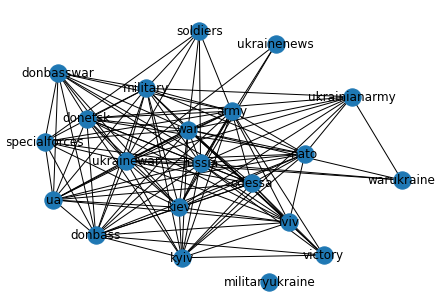

In [148]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from(hashtags)
G.add_edges_from(edges)

pos = nx.spring_layout(G, k=2.5, iterations=50)
nx.draw(G, pos, with_labels = True)

In [149]:
import statistics

print(f'Nodes: {G.number_of_nodes()}')
print(f'Edges: {G.number_of_edges()}')
print(f'Degree Centrality: {nx.degree_centrality(G)}')
average_degree_centrality = statistics.mean([x for x in nx.degree_centrality(G).values()])
print(f'Average degree centrality: {average_degree_centrality}')
print(f'Diameter: {nx.diameter(G)}')
print(f'Clustering Coefficient: {nx.clustering(G)}')
print(f'Average Clustering Coefficient: {nx.average_clustering(G)}')

Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])

print(f'Nodes of largest component: {G0.number_of_nodes()}')

data = [['Nodes', G.number_of_nodes()],
        ['Edges', G.number_of_edges()],
        ['Average degree centrality', statistics.mean([x for x in nx.degree_centrality(G).values()])],
        ['Diameter', nx.diameter(G)],
        ['Average Clustering Coefficient', nx.average_clustering(G)],
        ['Size largest component', G0.number_of_nodes()]]

Nodes: 21
Edges: 122
Degree Centrality: {'ukrainewar': 0.9, 'war': 0.9, 'army': 0.8, 'military': 0.75, 'kiev': 0.8, 'ua': 0.65, 'specialforces': 0.5, 'donbass': 0.75, 'donbasswar': 0.55, 'warukraine': 0.2, 'russia': 0.9500000000000001, 'donetsk': 0.7000000000000001, 'soldiers': 0.30000000000000004, 'ukrainenews': 0.15000000000000002, 'odessa': 0.65, 'ukrainianarmy': 0.45, 'lviv': 0.55, 'victory': 0.35000000000000003, 'nato': 0.65, 'kyiv': 0.65, 'militaryukraine': 0.0}
Average degree centrality: 0.580952380952381


NetworkXError: Found infinite path length because the graph is not connected

In [150]:
from tabulate import tabulate

print(tabulate(data, headers=['Property', 'Value'], tablefmt='fancy_grid'))

╒════════════════════════════════╤════════════╕
│ Property                       │      Value │
╞════════════════════════════════╪════════════╡
│ Nodes                          │  20        │
├────────────────────────────────┼────────────┤
│ Edges                          │ 122        │
├────────────────────────────────┼────────────┤
│ Average degree centrality      │   0.642105 │
├────────────────────────────────┼────────────┤
│ Diameter                       │   2        │
├────────────────────────────────┼────────────┤
│ Average Clustering Coefficient │   0.848442 │
├────────────────────────────────┼────────────┤
│ Size largest component         │  20        │
╘════════════════════════════════╧════════════╛


In [151]:
data2 = []

degree_centrality = nx.degree_centrality(G)
clustering_coefficient = nx.clustering(G)

for key in degree_centrality.keys():
    data2.append([key, degree_centrality[key], clustering_coefficient[key]])

print(tabulate(data2, headers=['Node', 'Degree Centrality', 'Clustering Centrality'], tablefmt='fancy_grid'))

╒═════════════════╤═════════════════════╤═════════════════════════╕
│ Node            │   Degree Centrality │   Clustering Centrality │
╞═════════════════╪═════════════════════╪═════════════════════════╡
│ ukrainewar      │                0.9  │                0.633987 │
├─────────────────┼─────────────────────┼─────────────────────────┤
│ war             │                0.9  │                0.660131 │
├─────────────────┼─────────────────────┼─────────────────────────┤
│ army            │                0.8  │                0.758333 │
├─────────────────┼─────────────────────┼─────────────────────────┤
│ military        │                0.75 │                0.733333 │
├─────────────────┼─────────────────────┼─────────────────────────┤
│ kiev            │                0.8  │                0.741667 │
├─────────────────┼─────────────────────┼─────────────────────────┤
│ ua              │                0.65 │                0.897436 │
├─────────────────┼─────────────────────┼───────

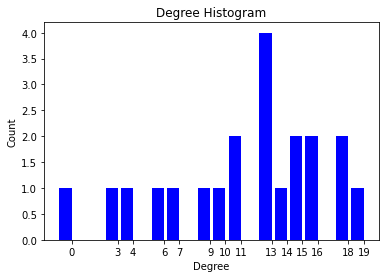

In [152]:
import collections

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)


plt.show()

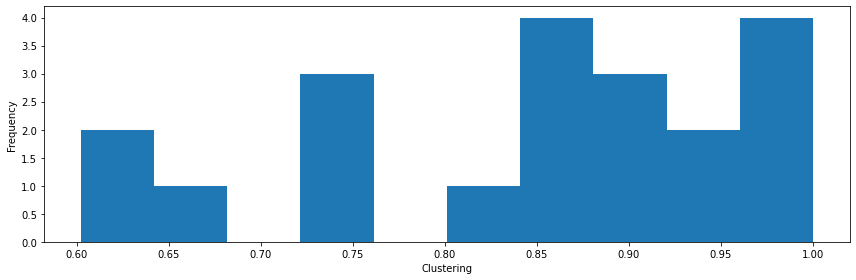

In [153]:
from matplotlib.cm import ScalarMappable

gc = G.subgraph(max(nx.connected_components(G)))
lcc = nx.clustering(gc)

fig, (ax1) = plt.subplots(ncols=1, figsize=(12, 4))

ax1.hist(lcc.values(), bins=10)
ax1.set_xlabel('Clustering')
ax1.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [154]:
communities = nx.algorithms.community.label_propagation_communities(G)

In [155]:
print(communities)

dict_values([{'kiev', 'specialforces', 'ukrainianarmy', 'russia', 'warukraine', 'donbasswar', 'war', 'donbass', 'donetsk', 'ukrainewar', 'odessa', 'victory', 'ukrainenews', 'lviv', 'military', 'ua', 'nato', 'soldiers', 'kyiv', 'army'}, {'militaryukraine'}])


In [166]:
list_communities = list(communities)
subgraph1 = G.subgraph(list_communities[0])
subgraph2 = G.subgraph(list_communities[1])

In [169]:
data_subgraph1 = [['Nodes', subgraph1.number_of_nodes()],
                    ['Edges', subgraph1.number_of_edges()],
                    ['Average degree centrality', statistics.mean([x for x in nx.degree_centrality(subgraph1).values()])],
                    ['Diameter', nx.diameter(subgraph1)],
                    ['Average Clustering Coefficient', nx.average_clustering(subgraph1)]]

data_subgraph2 = [['Nodes', subgraph2.number_of_nodes()],
                    ['Edges', subgraph2.number_of_edges()],
                    ['Average degree centrality', statistics.mean([x for x in nx.degree_centrality(subgraph2).values()])],
                    ['Diameter', nx.diameter(subgraph2)],
                    ['Average Clustering Coefficient', nx.average_clustering(subgraph2)]]

In [172]:
print(tabulate(data_subgraph1, headers=['Property Community 1', 'Value'], tablefmt='fancy_grid'))

print(tabulate(data_subgraph2, headers=['Property Community 2', 'Value'], tablefmt='fancy_grid'))

╒════════════════════════════════╤════════════╕
│ Property Community 1           │      Value │
╞════════════════════════════════╪════════════╡
│ Nodes                          │  20        │
├────────────────────────────────┼────────────┤
│ Edges                          │ 122        │
├────────────────────────────────┼────────────┤
│ Average degree centrality      │   0.642105 │
├────────────────────────────────┼────────────┤
│ Diameter                       │   2        │
├────────────────────────────────┼────────────┤
│ Average Clustering Coefficient │   0.848442 │
╘════════════════════════════════╧════════════╛
╒════════════════════════════════╤═════════╕
│ Property Community 2           │   Value │
╞════════════════════════════════╪═════════╡
│ Nodes                          │       1 │
├────────────────────────────────┼─────────┤
│ Edges                          │       0 │
├────────────────────────────────┼─────────┤
│ Average degree centrality      │       1 │
├───────────────

In [179]:
sorted_degree_centrality = {k: v for k, v in sorted(nx.degree_centrality(G).items(), key=lambda item: item[1], reverse=True)}

In [180]:
print(sorted_degree_centrality)

{'russia': 0.9500000000000001, 'ukrainewar': 0.9, 'war': 0.9, 'army': 0.8, 'kiev': 0.8, 'military': 0.75, 'donbass': 0.75, 'donetsk': 0.7000000000000001, 'ua': 0.65, 'odessa': 0.65, 'nato': 0.65, 'kyiv': 0.65, 'donbasswar': 0.55, 'lviv': 0.55, 'specialforces': 0.5, 'ukrainianarmy': 0.45, 'victory': 0.35000000000000003, 'soldiers': 0.30000000000000004, 'warukraine': 0.2, 'ukrainenews': 0.15000000000000002, 'militaryukraine': 0.0}


In [236]:
rank_10_hashtags = [x for x in sorted_degree_centrality.keys()]
rank_10_hashtags = rank_10_hashtags[:10]

list_of_usernames = {}

for index, row in tweets.iterrows():
    intersection = set([hashtag_tweet.lower() for hashtag_tweet in ast.literal_eval(row.loc['hashtags'])]).intersection(rank_10_hashtags)
    if len(intersection) > 0:
        list_of_usernames[row.loc['username']] = {'hashtag':[x for x in intersection]}


In [237]:
import botometer
import random

rapidapi_key = "6a7c8570f3mshe25c454132d8231p19a690jsnfdc9e513444b"
twitter_app_auth = {
    'consumer_key': 'rI6ajT1sZdu3DD0G92k2cOzpk',
    'consumer_secret': '391VTODkfp8y9PIYOs4CVj4elrdjLk6hKPawQxZWVLiqzBYH99',
    'access_token': '1508709948766699525-kYtl83OTJgaQcwRK6Yl8q4PH3rHfD6',
    'access_token_secret': 'UEpHsWoEbazRLZZ47T39nGDvpSyPQY0lalStqvH10gm5P',
  }

bom = botometer.Botometer(wait_on_ratelimit=True,
                          rapidapi_key=rapidapi_key,
                          **twitter_app_auth)

accounts = [key for (key,value) in list_of_usernames.items()]

sample = random.choices(accounts, k=10)
sample_at = [''.join(['@', s]) for s in sample]

results = bom.check_accounts_in(sample_at)


In [238]:
values = []

for username, result in results:
    print(result['cap'])
    values.append(statistics.mean([x for x in result['cap'].values()]))

{'english': 0.30618807248975083, 'universal': 0.6415870166679795}
{'english': 0.7967247202742335, 'universal': 0.8091273704655436}
{'english': 0.6915799517497913, 'universal': 0.49449072748283696}
{'english': 0.8076035454448582, 'universal': 0.8082278383974655}
{'english': 0.8036706514015852, 'universal': 0.8115094045580712}
{'english': 0.7939576449836836, 'universal': 0.8039704121290502}
{'english': 0.8100783815308749, 'universal': 0.8054092120440788}
{'english': 0.7611878625273879, 'universal': 0.7897432630001835}
{'english': 0.7971738960175367, 'universal': 0.8030212452554465}
{'english': 0.7964100716330078, 'universal': 0.7966241294741505}


In [239]:
print(values)

[0.47388754457886517, 0.8029260453698885, 0.5930353396163142, 0.8079156919211619, 0.8075900279798283, 0.7989640285563668, 0.8077437967874768, 0.7754655627637856, 0.8000975706364917, 0.7965171005535792]


In [240]:
rounded_values = [round(num) for num in values]
print(rounded_values)

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [241]:
for i, value in enumerate(rounded_values):
    list_of_usernames[sample[i]]['bot'] = value

In [243]:
hashtag_bot = { i : [] for i in hashtags }

for s in sample:
    for h in list_of_usernames[s]['hashtag']:
        hashtag_bot[h].append(list_of_usernames[s]['bot'])

print(hashtag_bot)

{'ukrainewar': [1, 1], 'war': [1], 'army': [], 'military': [], 'kiev': [], 'ua': [1], 'specialforces': [], 'donbass': [], 'donbasswar': [], 'warukraine': [], 'russia': [0, 1, 1, 1, 1, 1, 1], 'donetsk': [], 'soldiers': [], 'ukrainenews': [], 'odessa': [], 'ukrainianarmy': [], 'lviv': [], 'victory': [], 'nato': [], 'kyiv': [], 'militaryukraine': []}


In [244]:
hashtag_bot_dict = { i : {} for i in hashtags }

for key in hashtag_bot.keys():
    hashtag_bot_dict[key]['bot'] = hashtag_bot[key].count(1)
    hashtag_bot_dict[key]['no_bot'] = hashtag_bot[key].count(0)

print(hashtag_bot_dict)

{'ukrainewar': {'bot': 2, 'no_bot': 0}, 'war': {'bot': 1, 'no_bot': 0}, 'army': {'bot': 0, 'no_bot': 0}, 'military': {'bot': 0, 'no_bot': 0}, 'kiev': {'bot': 0, 'no_bot': 0}, 'ua': {'bot': 1, 'no_bot': 0}, 'specialforces': {'bot': 0, 'no_bot': 0}, 'donbass': {'bot': 0, 'no_bot': 0}, 'donbasswar': {'bot': 0, 'no_bot': 0}, 'warukraine': {'bot': 0, 'no_bot': 0}, 'russia': {'bot': 6, 'no_bot': 1}, 'donetsk': {'bot': 0, 'no_bot': 0}, 'soldiers': {'bot': 0, 'no_bot': 0}, 'ukrainenews': {'bot': 0, 'no_bot': 0}, 'odessa': {'bot': 0, 'no_bot': 0}, 'ukrainianarmy': {'bot': 0, 'no_bot': 0}, 'lviv': {'bot': 0, 'no_bot': 0}, 'victory': {'bot': 0, 'no_bot': 0}, 'nato': {'bot': 0, 'no_bot': 0}, 'kyiv': {'bot': 0, 'no_bot': 0}, 'militaryukraine': {'bot': 0, 'no_bot': 0}}


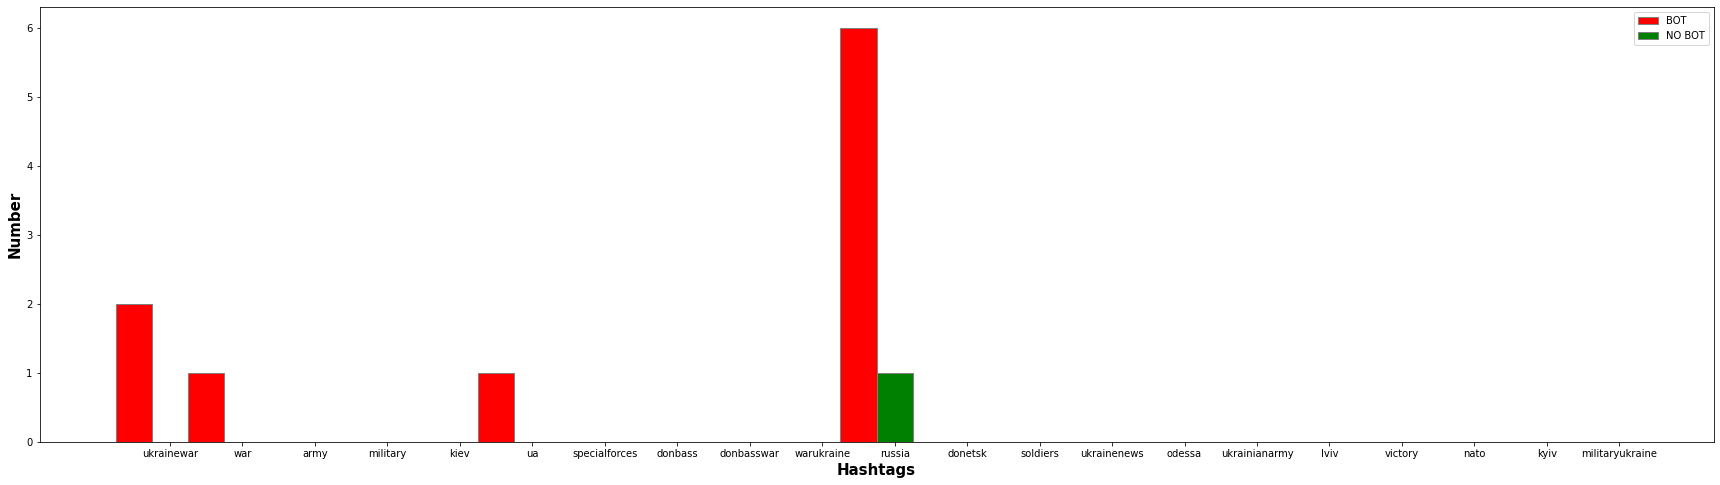

In [252]:
import matplotlib.pyplot as plt
import numpy as np
  
# set width of bar
barWidth = 0.5
fig = plt.subplots(figsize =(30, 8))
 
# set height of bar
x = hashtag_bot_dict.keys()
BOT = [x['bot'] for x in hashtag_bot_dict.values()]
NO_BOT = [x['no_bot'] for x in hashtag_bot_dict.values()]
 
# Set position of bar on X axis
br1 = np.arange(len(BOT))
br2 = [x + barWidth for x in br1]
 
# Make the plot
plt.bar(br1, BOT, color ='r', width = barWidth,
        edgecolor ='grey', label ='BOT')
plt.bar(br2, NO_BOT, color ='g', width = barWidth,
        edgecolor ='grey', label ='NO BOT')
 
# Adding Xticks
plt.xlabel('Hashtags', fontweight ='bold', fontsize = 15)
plt.ylabel('Number', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(BOT))],
        [key for key in hashtag_bot_dict.keys()])
 
plt.legend()
plt.show()
